Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2917 - accuracy: 0.9159
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1410 - accuracy: 0.9583
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1068 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0875 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - accuracy: 0.9774
313/313 - 0s - loss: 0.0736 - accuracy: 0.9783 - 444ms/epoch - 1ms/step
Test accuracy: 97.83%
313/313 [==============================] - 0s 931us/step


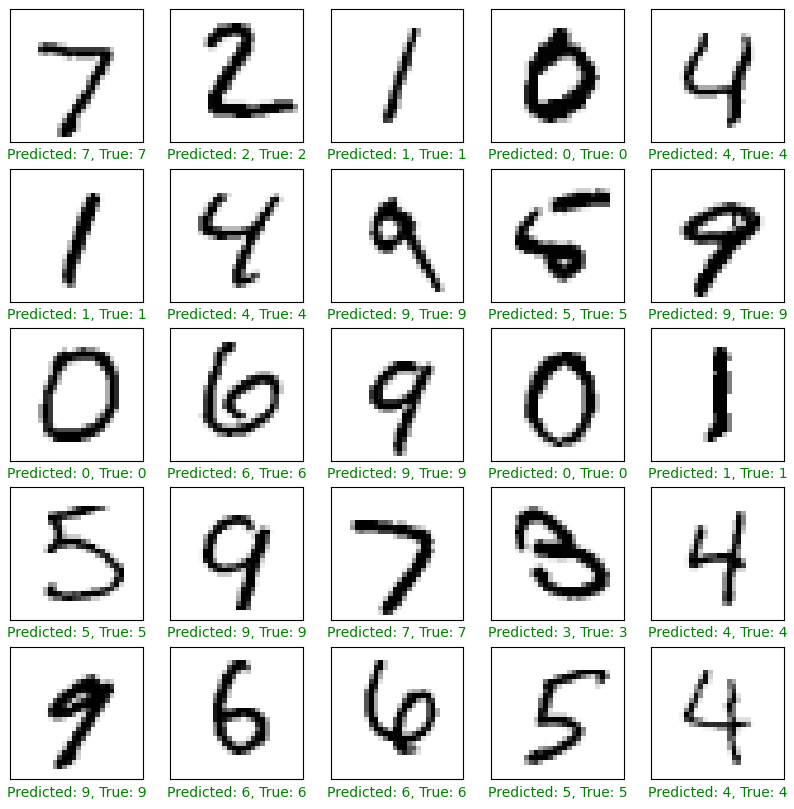

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc*100:.2f}%")

# Make predictions
predictions = model.predict(test_images)

# Visualize results
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Predicted: {predicted_label}, True: {true_label}", color=color)
plt.show()
